# Importación scripts y librerías

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import date
from datetime import datetime
import time
import os
import pickle
import sys

import json

import pandas as pd
from contextlib import redirect_stdout
import re
import matplotlib.pyplot as plt
import numpy as np

parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from scripts import dl_utils
from scripts import viz_tools
from scripts import models

import warnings

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

2024-09-27 10:16:43.750190: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-27 10:16:43.770557: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-27 10:16:43.770580: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-27 10:16:43.771190: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-27 10:16:43.774981: I tensorflow/core/platform/cpu_feature_guar

# Visualización de las Métricas generales

In [3]:
with open('../notebooks/resultados/checkpoint_resultados.pkl', 'rb') as file:
    model_data_list = pickle.load(file)

## Visualización del Tiempo de inferencia (s), Num épocas entrenamiento y Tiempo entrenamiento (s)

In [4]:
rows = []
for elem in model_data_list:
    rows.append([elem[0],elem[2][-1],round(elem[2][-2])])
columns = ["Nombre del modelo","Num épocas entrenamiento","Tiempo entrenamiento (s)"]
df = pd.DataFrame(rows, columns=columns)
display(df)

,Nombre del modelo,Num épocas entrenamiento,Tiempo entrenamiento (s)
0,Base Model,160,436
1,AlexNet,101,358
2,Scratch Modified Model,127,446
3,VGG16 con Flatten,60,220
4,VGG16 con GlobalMaxPooling,102,368
5,VGG16 con GlobalAveragePooling,84,303
6,MobileNet con Flatten,58,212
7,MobileNet con GlobalMaxPooling,99,361
8,MobileNet con GlobalAveragePooling,40,147


## Visualización del macro avg f1-score

In [5]:
rows = []
for elem in model_data_list:
    rows.append([elem[0],
                 elem[3].iloc[3,3],
                 elem[3].iloc[0,3],
                 elem[3].iloc[1,3],
                 elem[3].iloc[0,3]-elem[3].iloc[1,3],
                 elem[3].iloc[0,1],
                 elem[3].iloc[1,1],
                 elem[3].iloc[0,2],
                 elem[3].iloc[1,2]])
columns = ["Nombre del modelo",
           "macro avg f1-score",
           "f1-score clase 0",
           "f1-score clase 1",
           "diff f1-scores",
           "precision clase 0",
           "precision clase 1",
           "recall clase 0",
           "recall clase 1"]
df = pd.DataFrame(rows, columns=columns)
display(df)

,Nombre del modelo,macro avg f1-score,f1-score clase 0,f1-score clase 1,diff f1-scores,precision clase 0,precision clase 1,recall clase 0,recall clase 1
0,Base Model,0.954,0.964,0.944,0.020,0.937,0.988,0.993,0.903
1,AlexNet,0.964,0.970,0.957,0.013,0.974,0.952,0.967,0.962
2,Scratch Modified Model,0.977,0.982,0.973,0.009,0.974,0.983,0.989,0.962
3,VGG16 con Flatten,0.959,0.967,0.951,0.016,0.960,0.961,0.974,0.941
4,VGG16 con GlobalMaxPooling,0.970,0.976,0.965,0.011,0.981,0.957,0.970,0.973
5,VGG16 con GlobalAveragePooling,0.970,0.976,0.964,0.012,0.967,0.978,0.985,0.951
6,MobileNet con Flatten,0.964,0.970,0.957,0.013,0.974,0.952,0.967,0.962
7,MobileNet con GlobalMaxPooling,0.964,0.970,0.958,0.012,0.985,0.938,0.955,0.978
8,MobileNet con GlobalAveragePooling,0.963,0.971,0.956,0.015,0.957,0.977,0.985,0.935


## Visualización del tiempo de inferencia vs número de parámetros entrenables

In [6]:
rows = []
for elem in model_data_list:
    rows.append([elem[0],elem[1],elem[4][0]])
columns = ["Nombre del modelo","Tiempo de inferencia (s)","Numero total de parámetros"]
df = pd.DataFrame(rows, columns=columns)
display(df)

,Nombre del modelo,Tiempo de inferencia (s),Numero total de parámetros
0,Base Model,0.209505,116577
1,AlexNet,0.260163,10427873
2,Scratch Modified Model,0.222765,1929281
3,VGG16 con Flatten,0.363430,15507841
4,VGG16 con GlobalMaxPooling,0.153334,15507841
5,VGG16 con GlobalAveragePooling,0.157041,15507841
6,MobileNet con Flatten,0.541822,12932353
7,MobileNet con GlobalMaxPooling,0.242858,4543745
8,MobileNet con GlobalAveragePooling,0.257628,4543745


## Visualización del número de parámetros entrenables

In [7]:
rows = []
for elem in model_data_list:
    aux_params = []
    aux_size = []
    rows.append([elem[0],elem[4][0],f"{round((int(elem[4][1])/int(elem[4][0]))*100)}",f"{round((int(elem[4][2])/int(elem[4][0]))*100)}"])    
columns = ["Nombre del modelo","Numero total de parámetros","Porcentaje entrenable (%)", "Porcentaje no entrenable (%)"]
df = pd.DataFrame(rows, columns=columns)
display(df)

rows = []
for elem in model_data_list:
    aux_params = []
    aux_size = []
    rows.append([elem[0]]+elem[4][0:3])    
columns = ["Nombre del modelo","Numero total de parámetros","Parametros entrenables","Parametros no entrenables"]
df = pd.DataFrame(rows, columns=columns)
display(df)

,Nombre del modelo,Numero total de parámetros,Porcentaje entrenable (%),Porcentaje no entrenable (%)
0,Base Model,116577,100,0
1,AlexNet,10427873,100,0
2,Scratch Modified Model,1929281,100,0
3,VGG16 con Flatten,15507841,52,48
4,VGG16 con GlobalMaxPooling,15507841,52,48
5,VGG16 con GlobalAveragePooling,15507841,52,48
6,MobileNet con Flatten,12932353,90,10
7,MobileNet con GlobalMaxPooling,4543745,71,29
8,MobileNet con GlobalAveragePooling,4543745,71,29


,Nombre del modelo,Numero total de parámetros,Parametros entrenables,Parametros no entrenables
0,Base Model,116577,116577,0.0
1,AlexNet,10427873,10427873,0.0
2,Scratch Modified Model,1929281,1929281,0.0
3,VGG16 con Flatten,15507841,8132737,7375104.0
4,VGG16 con GlobalMaxPooling,15507841,8132737,7375104.0
5,VGG16 con GlobalAveragePooling,15507841,8132737,7375104.0
6,MobileNet con Flatten,12932353,11596801,1335552.0
7,MobileNet con GlobalMaxPooling,4543745,3208193,1335552.0
8,MobileNet con GlobalAveragePooling,4543745,3208193,1335552.0


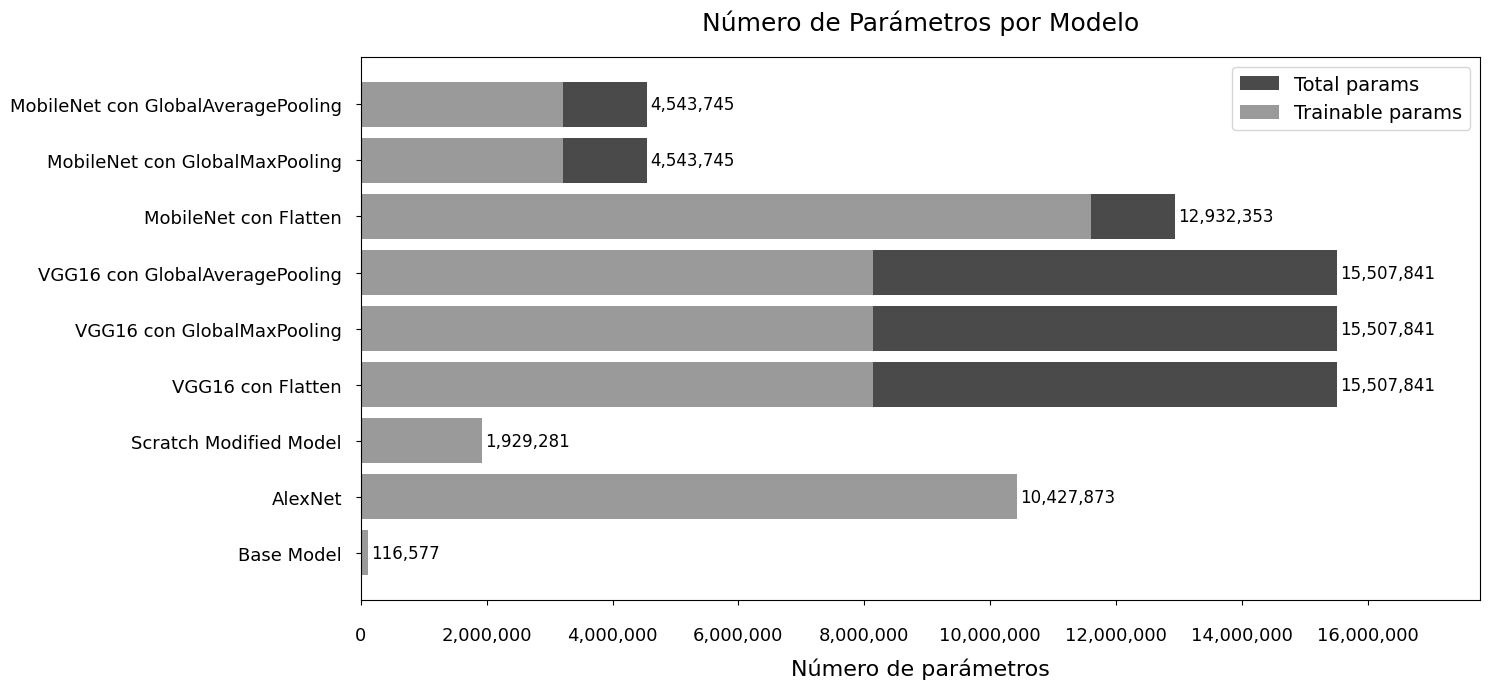

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Definición de colores personalizados
COLOR1 = '#4A4A4A'
COLOR2 = '#9A9A9A'

# Función para formatear los ticks del eje X
def format_func(value, tick_number):
    return f'{int(value):,}'  # Formato con separadores de miles

# Generar la visualización de barras sin escala logarítmica
fig, ax = plt.subplots(figsize=(15, 7))  # Crear figura y ejes

# Cambiar el color de fondo de la figura y del área de la gráfica
fig.patch.set_facecolor('#ffffff')  # Fondo general de la figura
ax.set_facecolor('#ffffff')  # Fondo del área de la gráfica

# Añadimos las barras
total_bars = ax.barh(df['Nombre del modelo'], df['Numero total de parámetros'], color=COLOR1, label='Total params')
trainable_bars = ax.barh(df['Nombre del modelo'], df['Parametros entrenables'], color=COLOR2, label='Trainable params')

# Ajustar el rango del eje X de 10^5 a 10^7
ax.set_xlim(0, 10**7.25)

# Aplicar el formato a los ticks del eje X
ax.xaxis.set_major_formatter(FuncFormatter(format_func))

# Cambiar el tamaño y el espaciado de los ticks del eje X y Y
ax.tick_params(axis='x', labelsize=13, pad=15)  # Espacio entre los valores y el eje X
ax.tick_params(axis='y', labelsize=13, pad=10)  # Espacio entre los valores y el eje Y

# Añadir los valores sobre las barras
for i, (total_bar, trainable_bar) in enumerate(zip(total_bars, trainable_bars)):
    # Para los Total params
    ax.text(total_bar.get_width() + 50000, total_bar.get_y() + total_bar.get_height()/2,
             f'{df["Numero total de parámetros"][i]:,}', va='center', ha='left', fontsize=12, color='black')
    
    # Para los Trainable params
    # ax.text(trainable_bar.get_width() + 50000, trainable_bar.get_y() + trainable_bar.get_height()/2,
    #         f'{df["Trainable params"][i]:,}', va='center', ha='left', fontsize=12, color='orange')

# Cambiar el tamaño de la leyenda y el título
ax.legend(fontsize=14)
ax.set_xlabel('Número de parámetros', fontsize=16, labelpad=10)  # Espacio entre la etiqueta del eje X y el gráfico
ax.set_title('Número de Parámetros por Modelo', fontsize=18, pad=20)  # Espacio entre el título y el gráfico

# Ajustar diseño y mostrar gráfica
plt.tight_layout()
plt.show()

## Visualización del tamaño de los modelos

In [9]:
rows = []
for elem in model_data_list:
    aux_params = []
    aux_size = []
    rows.append([elem[0]]+elem[4][3:])    
columns = ["Nombre del modelo","Tam total del modelo (MB)", "Tam entrenable (MB)", "Tam no entrenable (MB)"]
df = pd.DataFrame(rows, columns=columns)
display(df)

,Nombre del modelo,Tam total del modelo (MB),Tam entrenable (MB),Tam no entrenable (MB)
0,Base Model,0.44,0.44,0.00
1,AlexNet,39.78,39.78,0.00
2,Scratch Modified Model,7.36,7.36,0.00
3,VGG16 con Flatten,59.16,31.02,28.13
4,VGG16 con GlobalMaxPooling,59.16,31.02,28.13
5,VGG16 con GlobalAveragePooling,59.16,31.02,28.13
6,MobileNet con Flatten,49.33,44.24,5.09
7,MobileNet con GlobalMaxPooling,17.33,12.24,5.09
8,MobileNet con GlobalAveragePooling,17.33,12.24,5.09
